# 准备数据

In [1]:
#读取MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist_data_flolder="MNIST_data"#文件在本地的存储路径
data=input_data.read_data_sets(mnist_data_flolder,one_hot=False)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#划分数据集
X0=data.train.images
Y0=data.train.labels
X1=data.validation.images
Y1=data.validation.labels
X2=data.test.images
Y2=data.test.labels
# X0.shape
# X1.shape
# X2.shape

<Figure size 432x288 with 0 Axes>

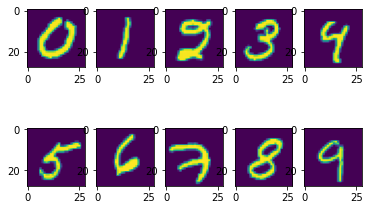

In [3]:
#展示手写数字图片
from matplotlib import pyplot as plt
plt.figure()
fig,ax=plt.subplots(2,5)
ax=ax.flatten()
for i in range(10):
    Im=X0[Y0==i][0].reshape(28,28)
    ax[i].imshow(Im)
plt.show()

In [4]:
#产生one_hot因变量
Y0
from keras.utils import to_categorical
YY0=to_categorical(Y0)
YY1=to_categorical(Y1)
YY2=to_categorical(Y2)
YY0

Using TensorFlow backend.


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 逻辑回归模型构建

In [5]:
from keras.layers import Input,Dense,Activation
from keras import Model

input_shape=(784,)
input_layer=Input(input_shape)
x=Dense(10)(input_layer)
x=Activation("softmax")(x)
output_layer=x

model=Model(input_layer,output_layer)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 模型编译

In [6]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(0.01),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

# 模型拟合

In [7]:
history=model.fit(X0,YY0,
                 validation_data=(X1,YY1),
                 batch_size=1000,
                 epochs=100)


Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 0s 9us/step - loss: 0.5876 - accuracy: 0.8320 - val_loss: 0.3269 - val_accuracy: 0.9072
Epoch 2/100
55000/55000 [==============================] - 0s 4us/step - loss: 0.3229 - accuracy: 0.9100 - val_loss: 0.2891 - val_accuracy: 0.9212

In [8]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

D:\DSABD\Anaconda\www.anaconda.com\Anaconda3\envs\TensorflowOne\lib\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  if __name__ == '__main__':
D:\DSABD\Anaconda\www.anaconda.com\Anaconda3\envs\TensorflowOne\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


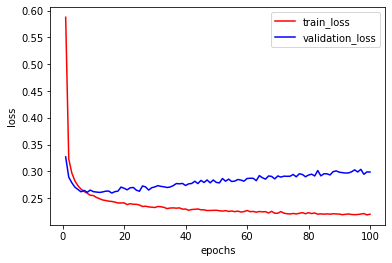

In [9]:
import matplotlib.pyplot as plt

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values)+1)

#绘制训练集和验证集的损失函数变化曲线图
plt.plot(epochs,loss_values,"b",color='red',label="train_loss")
plt.plot(epochs,val_loss_values,"b",color='blue',label="validation_loss")

plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()#给图像加图例
plt.show()



D:\DSABD\Anaconda\www.anaconda.com\Anaconda3\envs\TensorflowOne\lib\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  if __name__ == '__main__':
D:\DSABD\Anaconda\www.anaconda.com\Anaconda3\envs\TensorflowOne\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


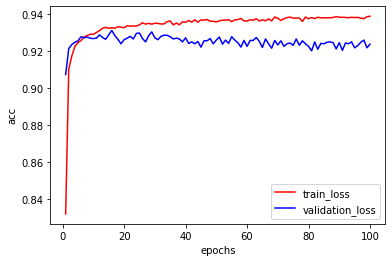

In [10]:
import matplotlib.pyplot as plt

acc_values=history_dict["accuracy"]
val_acc_values=history_dict["val_accuracy"]

epochs=range(1,len(loss_values)+1)

#绘制训练集和验证集的损失函数变化曲线图
plt.plot(epochs,acc_values,"b",color='red',label="train_loss")
plt.plot(epochs,val_acc_values,"b",color='blue',label="validation_loss")

plt.xlabel("epochs")
plt.ylabel('acc')
plt.legend()#给图像加图例
plt.show()

In [11]:
#以上的模型针对10分类问题精度到达93%
results=model.evaluate(X2,YY2)#model.evaluate输入数据和标签，输出损失和精确度
results

10000/10000 [==============================] - 0s 30us/step


[0.30594083116650583, 0.9243999719619751]

In [12]:
#查看第二层的权重参数
a=model.layers[1].get_weights()
# a
model.layers[1].get_weights()[0].shape

(784, 10)

In [13]:
#预测一下测试集里面的第二张图片
import numpy as np

x=X2[1]
x=x.reshape(1,784)
y_pre_pic2=model.predict(x)
y_pre_pic2_labels=np.argmax(y_pre_pic2)
print(y_pre_pic2_labels)

print(Y2[1])


2
2


In [14]:
#计算预测值与真实值之间的精确度
from sklearn import metrics
y_pre=model.predict(X2)#输入测试数据，输出预测结果
# y_pre.shape
y_pre_label=[]
for i in range(len(y_pre)):
    y_labels=np.argmax(y_pre[i])
    y_pre_label.append(y_labels)
# mse=((y_pre_label-Y2)**2).mean()
acc=metrics.accuracy_score(Y2,y_pre_label)
acc

0.9244